## Handling Missing StackOverflow Data using Python
(Pandas, Scikit-Learn)

A project for my Codecademy professional certification
in Data Science and ML Engineering

Robert Hall 01/05/2024

In [59]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 

# filtering out warnings for some privacy-related reasons
warnings.filterwarnings("ignore")

In [60]:
# import dataset and view features
df = pd.read_csv("developer_dataset.csv")

print(df.columns)

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


In [61]:
# finding counts of non-null datapoints in each column
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [62]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


In [63]:
maxRows = df["RespondentID"].count()

percentsMissing = round((1-df.count() / maxRows) * 100, 2)

print("Percent % Missing Data per Column: \n")
print(percentsMissing)

Percent % Missing Data per Column: 

RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64


In [64]:
# drop columns with high percentage data missing
# as they are thus inconsequential and is safe to 
# do so
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'],
        axis=1,
        inplace=True)

In [65]:
# get new dataframe that reports number of developers
# per country
df[['RespondentID', 'Country',]].groupby('Country').count()

,RespondentID
Country,
Canada,8979
China,2072
France,6861
Germany,16215
Japan,1049
Mexico,1918
Spain,4534
United Kingdom,15854
United States,53727


In [66]:
# gather all missing data
missingData = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()


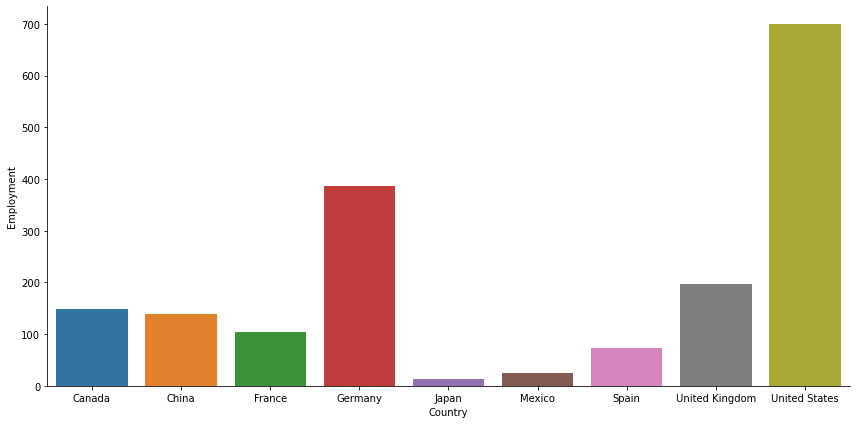

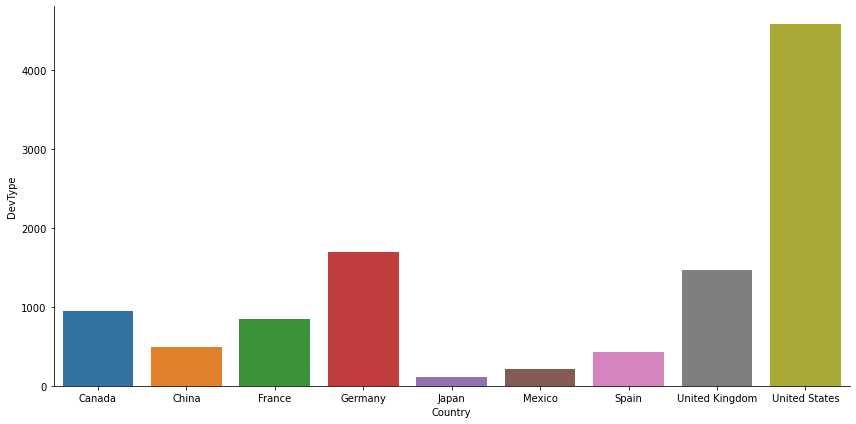

In [67]:
# create bar charts for 
A = sns.catplot(
    data=missingData, kind='bar', 
    x='Country', y='Employment',
    height=6, aspect=2
)

B = sns.catplot(
    data=missingData, kind='bar',
    x='Country', y='DevType',
    height=6, aspect=2
)

In [68]:
# data isn't missing significantly per relative size
# of each country, therefore it is Missing Completely
# at Random (MCAR) and is safe to delete
df.dropna(subset=['Employment', 'DevType'],
          inplace=True,
          how='any')

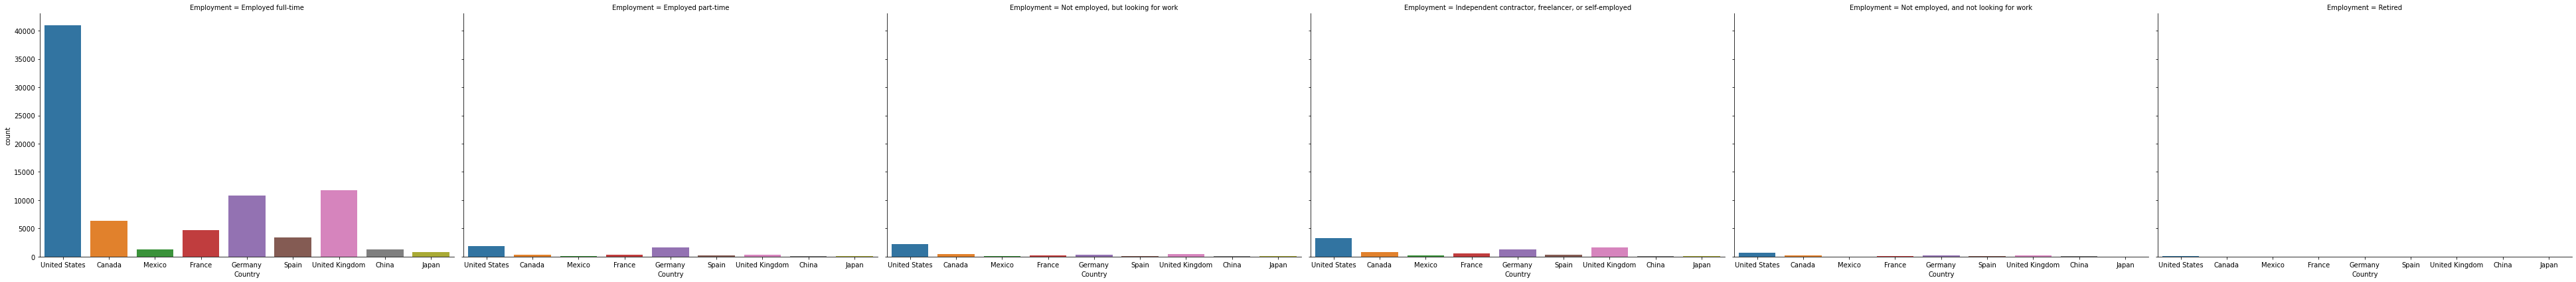

In [74]:
empfig = sns.catplot(x='Country', 
                     col='Employment',
                     data=df,
                     kind='count',
                     height=6,
                     aspect=1.5)

In [69]:
# sending warnings settings back to default
warnings.filterwarnings("default")